<a href="https://colab.research.google.com/github/Ohalu909/Neural-Computing/blob/main/NC_assg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [ ]:
#For reproducibility
seed=20  #To customize, change this value
np.random.seed(seed)

## Training Dataset

In [ ]:
# set the center point (a, b) and the standard deviation
a, b = 50, 50
sd1 = 10

c, d = 100,100
sd2 = 10

#Create dataset for movies I don't like (label=No) - This is for training dataset, for testing will create a new dataset since we can create our own dataset
input_no = []
# generate 100 random datapoints with (a, b) as center and sd1 as standard deviation
for i in range(100):
    x = random.normalvariate(a, sd1)
    y = random.normalvariate(b, sd1)
    input_no.append((x, y))

#Create datasets for movies I like (label=Yes)
input_yes= []
# generate 100 random datapoints with (c, d) as center and sd2 as standard deviation
for i in range(100):
    x = random.normalvariate(c, sd2)
    y = random.normalvariate(d, sd2)
    input_yes.append((x, y))

# add some overlap
for i in range(25):
    x = random.normalvariate(a, sd1)
    y = random.normalvariate(b, sd1)
    input_yes.append((x, y))

for i in range(25):
    x = random.normalvariate(c, sd2)
    y = random.normalvariate(d, sd2)
    input_no.append((x, y))

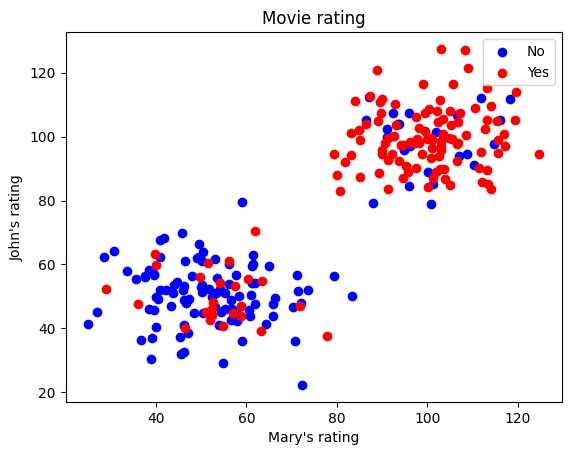

In [ ]:
#Visualize the dataset

# shuffle the datapoints
random.shuffle(input_no)
random.shuffle(input_yes)

# create a scatter plot of the datapoints
x1, y1 = zip(*input_no)
plt.scatter(x1, y1, color='blue', label='No')

x2, y2 = zip(*input_yes)
plt.scatter(x2, y2, color='red', label='Yes')

# add labels and title
plt.xlabel("Mary's rating")
plt.ylabel("John's rating")
plt.title('Movie rating')
plt.legend()

# show the plot
plt.show()

In [ ]:
# combine input_no and input_yes using np.concatenate
X_train = np.concatenate([input_no, input_yes])
# create the corresponding target vector y_true
y_true_train = np.concatenate([np.zeros(len(input_no)), np.ones(len(input_yes))])
print(type(X_train))
print(X_train.shape)
print(y_true_train)


<class 'numpy.ndarray'>
(250, 2)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Test Dataset

In [ ]:
# set the center point (a, b) and the standard deviation
a, b = 40, 40
sd1 = 10

c, d = 80, 80
sd2 = 10

#Create dataset for movies I don't like (label=No) - This is for training dataset, for testing will create a new dataset since we can create our own dataset
input_no = []
# generate 100 random datapoints with (a, b) as center and sd1 as standard deviation
for i in range(100):
    x = random.normalvariate(a, sd1)
    y = random.normalvariate(b, sd1)
    input_no.append((x, y))

#Create datasets for movies I like (label=Yes)
input_yes= []
# generate 100 random datapoints with (c, d) as center and sd2 as standard deviation
for i in range(100):
    x = random.normalvariate(c, sd2)
    y = random.normalvariate(d, sd2)
    input_yes.append((x, y))

# add some overlap
for i in range(25):
    x = random.normalvariate(a, sd1)
    y = random.normalvariate(b, sd1)
    input_yes.append((x, y))

for i in range(25):
    x = random.normalvariate(c, sd2)
    y = random.normalvariate(d, sd2)
    input_no.append((x, y))

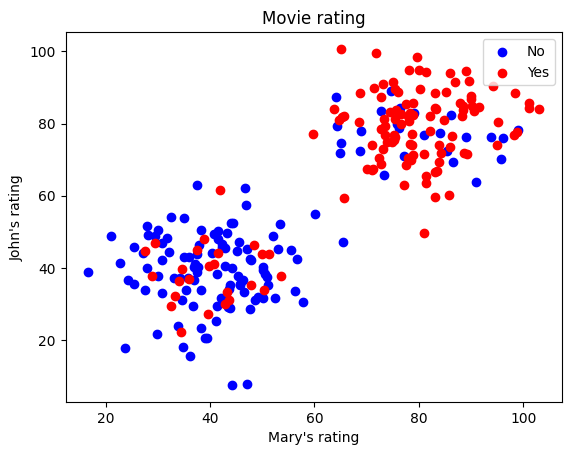

In [ ]:
#Visualize the dataset

# shuffle the datapoints
random.shuffle(input_no)
random.shuffle(input_yes)

# create a scatter plot of the datapoints
x1, y1 = zip(*input_no)
plt.scatter(x1, y1, color='blue', label='No')

x2, y2 = zip(*input_yes)
plt.scatter(x2, y2, color='red', label='Yes')

# add labels and title
plt.xlabel("Mary's rating")
plt.ylabel("John's rating")
plt.title('Movie rating')
plt.legend()

# show the plot
plt.show()

In [ ]:
# combine input_no and input_yes using np.concatenate
X_test = np.concatenate([input_no, input_yes])
# create the corresponding target vector y_true
y_true_test = np.concatenate([np.zeros(len(input_no)), np.ones(len(input_yes))])
#y_true2 = np.append(np.zeros(len(input_no)), np.ones(len(input_yes)), None)
print(type(X_test))
print(X_test.shape)
print(y_true_test)
#print(y_true2)

<class 'numpy.ndarray'>
(250, 2)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Perceptron with SGD - Training:

>



In [ ]:
# MY CODE

# Define activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define loss function
def squared_loss(y_true, y_pred):
    return np.square(y_true - y_pred)

def stochastic_gradient_descent(X, y_true, weights, bias, learning_rate):


    correct_predictions_sgd = 0

    for i in range(1000):
      #pick a random index from the dataset
      random_idx = np.random.randint(0, 250)
      # get the random example and corresponding label
      random_example = X[random_idx]
      random_label = y_true[random_idx]

      z = weights * random_example.T + bias
      f = sigmoid(z)

      #partial derivatives (gradient components)
      g_weights = 2 * (f - random_label) * f * (1 - f) * random_example
      g_bias = 2 * (f - random_label) * f * (1 - f)

      #update weights and bias
      weights = weights - learning_rate * g_weights
      bias = bias - learning_rate * g_bias

      #print("y_true: ", y_true)
      #print("y_true shape: ", y_true.shape)
      #print("z: ", z)
      #print("f: ", f)

      # Print loss every 100 epochs
      #if i % 100 == 0:
        #loss = squared_loss(random_label, f) #y_pred = f
        #loss_list_sgd.append(loss)
        #print(f"Epoch {i}: Loss = {loss}")

      #print(f"Epoch {i}: Loss = {loss}")
      loss = squared_loss(random_label, f) #y_pred = f
      loss_list_sgd.append(loss)

      #calculate accuracy
      if (f >= 0.5).any():
        f = 1
      else:
        f = 0
      if f == random_label:
        correct_predictions_sgd += 1
      #accuracy = correct_predictions / len(X)
      accuracy_list_sgd.append((correct_predictions_sgd / len(X)) * 100)

      #append weights for graph purpose
      weight_no_sgd.append(weights[0])
      weight_yes_sgd.append(weights[1])

      y_pred_sgd.append(f)

    return weights, bias, loss_list_sgd, accuracy_list_sgd, weight_no_sgd, weight_yes_sgd, y_pred_sgd

# Initialize weights and bias randomly
weights = np.random.rand(2)
bias = np.random.rand(1)
print("Initial weight", weights)
print("Initial bias", bias)
# Set learning rate
learning_rate = 0.001

#Initialize list for graph visualization
loss_list_sgd = []
accuracy_list_sgd = []
weight_no_sgd = []
weight_yes_sgd = []
y_pred_sgd = []

stochastic_gradient_descent(X_train, y_true_train, weights, bias, learning_rate)
print("Final weight: ", weights)
print("Final bias: ", bias)
print(weight_no_sgd)
print(weight_yes_sgd)

Initial weight [0.5881308  0.89771373]
Initial bias [0.89153073]
Final weight:  [0.5881308  0.89771373]
Final bias:  [0.89153073]
[0.5881308010772742, 0.5881308010772742, 0.5881308010772742, 0.588130801077274, 0.588130801077274, 0.588130801077274, 0.588130801077274, 0.5881308010772721, 0.588130801077272, 0.588130801077272, 0.588130801077272, 0.588130801077272, 0.588130801077272, 0.5881308010772275, 0.5881308010772275, 0.5881308010772275, 0.5881308010772275, 0.5881308010772275, 0.5881308010772275, 0.5881308010772275, 0.5881308010772275, 0.5881308010772275, 0.5881308010772275, 0.5881308010766806, 0.5881308010766806, 0.5881308010766806, 0.5881308010766806, 0.5881308010766806, 0.5881307929004397, 0.5881307929004397, 0.5881307929004397, 0.5881307929004397, 0.5881307929004397, 0.5881307929004397, 0.5881307929004397, 0.5881307929004397, 0.5881307929004397, 0.5881307929004393, 0.5881307929004329, 0.5881307929004328, 0.5881307929004328, 0.5881307928998859, 0.5881307928998859, 0.5881307928998859

## Training Evaluation - SGD

Text(0.5, 1.0, 'Error')

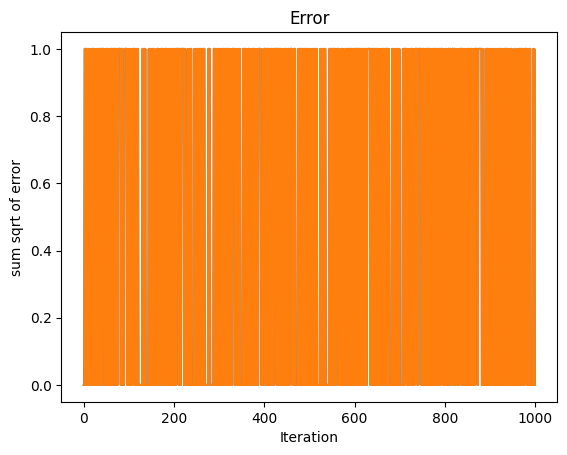

In [ ]:
plt.plot(loss_list_sgd)
# add labels and title
plt.xlabel("Iteration")
plt.ylabel("sum sqrt of error")
plt.title('Error')

Text(0.5, 1.0, 'Accuracy')

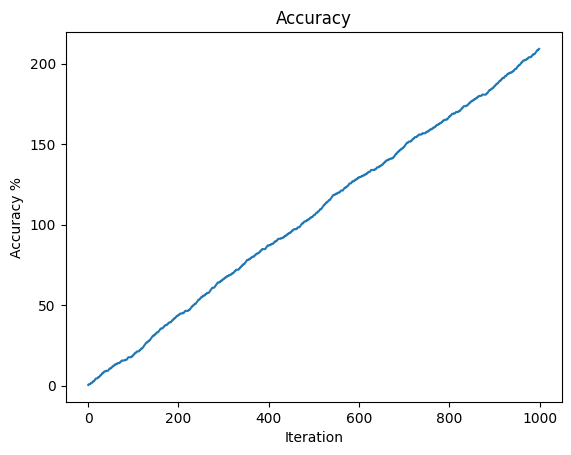

In [ ]:
plt.plot(accuracy_list_sgd)
# add labels and title
plt.xlabel("Iteration")
plt.ylabel("Accuracy %")
plt.title('Accuracy')

Text(0.5, 1.0, 'Weights')

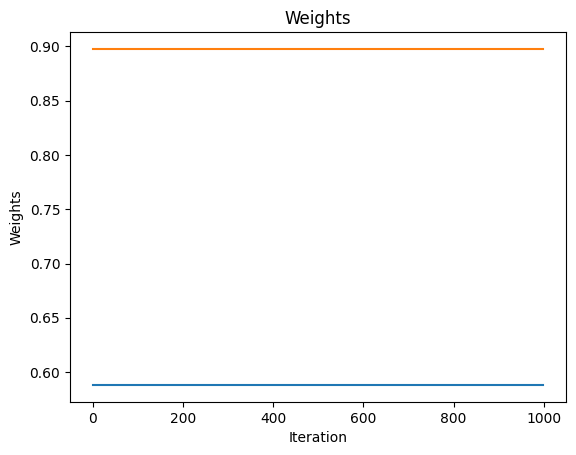

In [ ]:
plt.plot(weight_no_sgd)
plt.plot(weight_yes_sgd)
# add labels and title
plt.xlabel("Iteration")
plt.ylabel("Weights")
plt.title('Weights')

## 5. Minibatch (Stochastic) Gradient Descent (v2) - Training

In [ ]:
## MY CODE
#activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Mean Squared Rrror/loss function
def mse_loss(y_hat, y):
    y_hat = np.array(y_hat)
    y = np.array(y)
    return np.mean((y_hat - y)**2)

#Mean absolute error/loss function
def mae_loss(y_hat, y):
    return np.mean(np.abs(y_hat - y))

#partial derivative of the loss function L with respect to bias b
def dL_db(y_hat, y):
    return np.mean(2 * (y_hat - y))

#minibatch gradient descent
def minibatch_gradient_descent(X, y, lr=0.01, num_epochs=100, batch_size=32, verbose=True):
    num_examples, num_features = X.shape[0], X.shape[1]
    num_batches = int(num_examples / batch_size)
    w = np.zeros(num_features)
    b = 0
    np.random.seed(42)
    correct_predictions = 0

    for epoch in range(num_epochs):
        shuffled_indices = np.random.permutation(num_examples)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for batch_index in range(num_batches):
            batch_start = batch_index * batch_size
            batch_end = (batch_index + 1) * batch_size
            X_batch = X_shuffled[batch_start:batch_end]
            y_batch = y_shuffled[batch_start:batch_end]

            y_hat = X_batch.dot(w) + b
            loss = (1/batch_size) * np.sum(mse_loss(y_hat, y_batch))
            #dw = - lr * w
            dw = -(1/batch_size) * np.dot(X_batch.T, (y_hat - y_batch))
            db = -(1/batch_size) * learning_rate * np.sum(dL_db(y_hat, y_batch))#, axis=0)
            w += dw
            b += db

        #if verbose:
            #print(f"Epoch {epoch + 1}: Loss = {loss:.4f}")
            #loss_list.append(loss)
        loss_list_mbgd.append(loss)

        #calculate accuracy
        if (y_hat >= 0.5).any():
            y_hat = 1
        else:
            y_hat = 0
        if y_hat == y[batch_index]:
            correct_predictions += 1
        #accuracy = correct_predictions / len(X)
        accuracy_list_mbgd.append((correct_predictions / len(X)) * 100)

        #append weights for graph purpose
        weight_no_mbgd.append(w[0])
        weight_yes_mbgd.append(w[1])

        #y_pred_mbgd.append(y_hat)

    return w, b

# Set the hyperparameters
learning_rate = 0.01
num_epochs = 1000

# Initialize weights and bias randomly
np.random.seed(42)
weights = np.random.rand(2)
bias = np.random.rand(1)
print("Initial weights", weights)
print("Initial bias", bias)

# combine input_no and input_yes using np.concatenate
X = np.concatenate([input_no, input_yes])
# create the corresponding target vector y_true
y_true = np.concatenate([np.zeros(len(input_no)), np.ones(len(input_yes))])

loss_list_mbgd= []
accuracy_list_mbgd = []
weight_no_mbgd = []
weight_yes_mbgd = []
#y_pred_mbgd = []
# Train the model using minibatch gradient descent
w, b = minibatch_gradient_descent(X_train, y_true_train, learning_rate, num_epochs, batch_size=32)

# Print the trained parameters
print("Trained parameters:")
print("w = ", w)
print("b = ", b)
print("weight_no: ", weight_no_mbgd)
print("weight_yes: ", weight_yes_mbgd)
print("loss:", loss_list_mbgd)


Initial weights [0.37454012 0.95071431]
Initial bias [0.73199394]


<ipython-input-30-95747db366d1>:10: RuntimeWarning: overflow encountered in square
  return np.mean((y_hat - y)**2)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-30-95747db366d1>:45: RuntimeWarning: invalid value encountered in add
  w += dw
<ipython-input-30-95747db366d1>:46: RuntimeWarning: invalid value encountered in double_scalars
  b += db


Trained parameters:
w =  [nan nan]
b =  nan
weight_no:  [1.8730819513421286e+26, -9.69796620825386e+54, 5.331392752017058e+83, -3.315144063915171e+112, 1.4929576621416083e+141, -8.183849236517404e+169, 4.3836309593016823e+198, -2.321941851529808e+227, 1.1669254729293518e+256, -6.59890593559713e+284, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

## Training Evaluation - MBGD

Text(0.5, 1.0, 'Error')

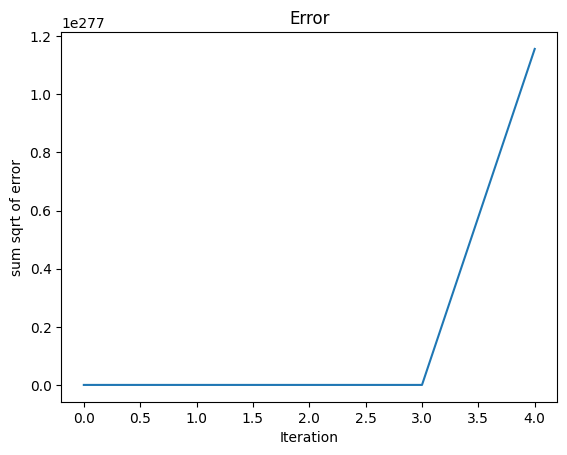

In [ ]:
plt.plot(loss_list_mbgd)
# add labels and title
plt.xlabel("Iteration")
plt.ylabel("sum sqrt of error")
plt.title('Error')

Text(0.5, 1.0, 'Accuracy')

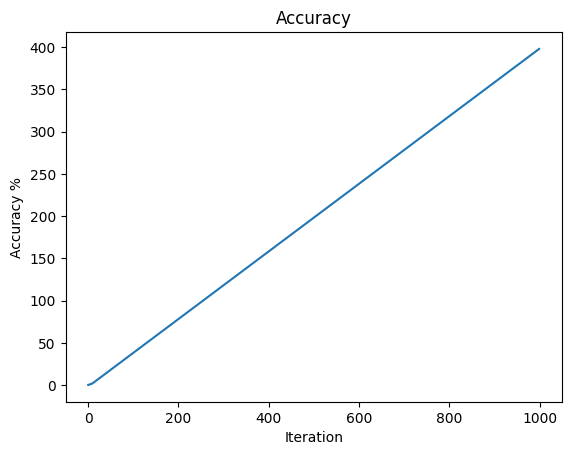

In [ ]:
plt.plot(accuracy_list_mbgd)
# add labels and title
plt.xlabel("Iteration")
plt.ylabel("Accuracy %")
plt.title('Accuracy')

Text(0.5, 1.0, 'Weights')

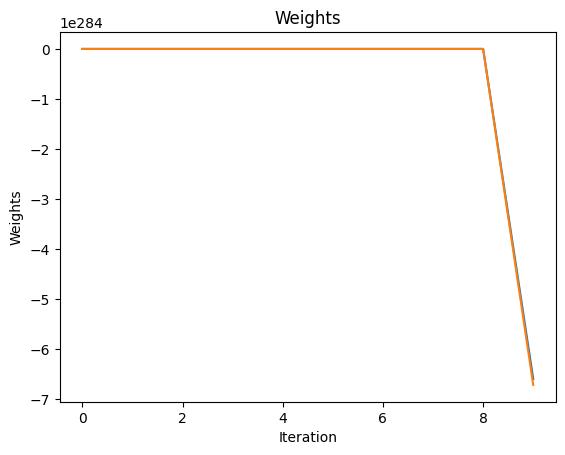

In [ ]:
plt.plot(weight_no_mbgd)
plt.plot(weight_yes_mbgd)
# add labels and title
plt.xlabel("Iteration")
plt.ylabel("Weights")
plt.title('Weights')

## Testing - SGD and MBGD

### SGD

In [ ]:
# Initialize weights and bias randomly
weights = np.random.rand(2)
bias = np.random.rand(1)
print("Initial weight", weights)
print("Initial bias", bias)
# Set learning rate
learning_rate = 0.1

#Initialize list for graph visualization
loss_list_sgd = []
accuracy_list_sgd = []
weight_no_sgd = []
weight_yes_sgd = []
y_pred_sgd = []

stochastic_gradient_descent(X_test, y_true_test, weights, bias, learning_rate)
print("Final weight: ", weights)
print("Final bias: ", bias)
print(weight_no_sgd)
print(weight_yes_sgd)

Initial weight [0.07276301 0.82186006]
Initial bias [0.70624223]
Final weight:  [0.07276301 0.82186006]
Final bias:  [0.70624223]
[-0.14671152241272312, -0.14681418271158483, -0.14511066305996714, -0.14461018434978826, -0.14461018437936435, -0.14035581598488886, -0.13985849027202485, -0.14017592260378645, -0.1401759232269976, -0.14020079340088268, -0.13983514658070606, -0.13962410448409673, -0.1397750145472288, -0.10078825537592073, -0.10079365312864834, -0.06457730904167219, -0.0655898116655544, -0.29140066907805606, -0.29072942648639477, -0.290729478217623, -0.29072947175468966, -0.2907295033541674, -0.2907295033501166, -0.29053948622705844, -0.2905394864920868, -0.2905394829826918, -0.2905394830304468, -0.29053953544588806, -0.29053953544588806, -0.2905395256357164, -0.2905395205553226, -0.29053949955370983, -0.29053949586599814, -0.29053948153958953, -0.2905394812491683, -0.29053947143895664, -0.29054117265050267, -0.29053432928461176, -0.290534328994059, -0.2905340924304313, -0.29

In [ ]:
print(len(y_pred_sgd))

1000


### MBGD

In [ ]:
# Set the hyperparameters
learning_rate = 0.1
num_epochs = 1000

# Initialize weights and bias randomly
np.random.seed(42)
weights = np.random.rand(2)
bias = np.random.rand(1)
print("Initial weights", weights)
print("Initial bias", bias)

# combine input_no and input_yes using np.concatenate
X = np.concatenate([input_no, input_yes])
# create the corresponding target vector y_true
y_true = np.concatenate([np.zeros(len(input_no)), np.ones(len(input_yes))])

loss_list= []
accuracy_list = []
weight_no = []
weight_yes = []
y_pred_mbgd = []
# Train the model using minibatch gradient descent
w, b = minibatch_gradient_descent(X_test, y_true_test, learning_rate, num_epochs, batch_size=32)

# Print the trained parameters
print("Trained parameters:")
print("w = ", w)
print("b = ", b)
print("weight_no: ", weight_no)
print("weight_yes: ", weight_yes)
print("loss:", loss_list)

Initial weights [0.37454012 0.95071431]
Initial bias [0.73199394]


<ipython-input-30-95747db366d1>:10: RuntimeWarning: overflow encountered in square
  return np.mean((y_hat - y)**2)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-30-95747db366d1>:45: RuntimeWarning: invalid value encountered in add
  w += dw
<ipython-input-30-95747db366d1>:46: RuntimeWarning: invalid value encountered in double_scalars
  b += db


Trained parameters:
w =  [nan nan]
b =  nan
weight_no:  []
weight_yes:  []
loss: []


In [ ]:
print(len(y_pred_mbgd))

0


## Decision Boundary Visualization

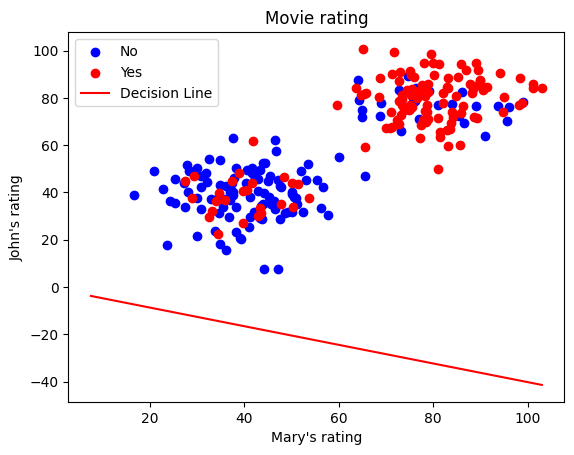

In [ ]:
#plt.scatter(x[:,0], x[:,1], c=y)
x1, y1 = zip(*input_no)
plt.scatter(x1, y1, color='blue', label='No')

x2, y2 = zip(*input_yes)
plt.scatter(x2, y2, color='red', label='Yes')

xx = X_test
y = y_true_test

# set plot axis labels and title
plt.xlabel("Mary's rating")
plt.ylabel("John's rating")
plt.title('Movie rating')
#plt.legend()

# initialize weights and bias
w = weights
b = bias

# plot the data points
#plt.scatter(x1, x2, c=y, cmap='viridis')

# plot the decision boundary line
x = np.linspace(np.min(xx), np.max(xx), 100)
y = (-w[0] / w[1]) * x - (b / w[1])
plt.plot(x, y, '-r', label='Decision Line')

plt.legend()
plt.show()


## Accuracy by class - Test Dataset

In [ ]:
# Accuracy by class of No and Yes
def get_confusion_matrix(y_true, y_hat):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y_true[i] == 0 and y_hat[i] == 0:
            tn += 1
        elif y_true[i] == 0 and y_hat[i] == 1:
            fp += 1
        else:
            fn += 1

    #return tp, tn, fp, fn
    print("-----Accuracy by class-----\n", "No: ", tn/(tn+fn)*100, "  Yes: ", tp/(tp+fp)*100)

print("SGD")
get_confusion_matrix(y_true_test, y_pred_sgd)

print("MBGD")
get_confusion_matrix(y_true_test, y_pred_mbgd)

SGD


ZeroDivisionError: ignored

## 3D graph visualization

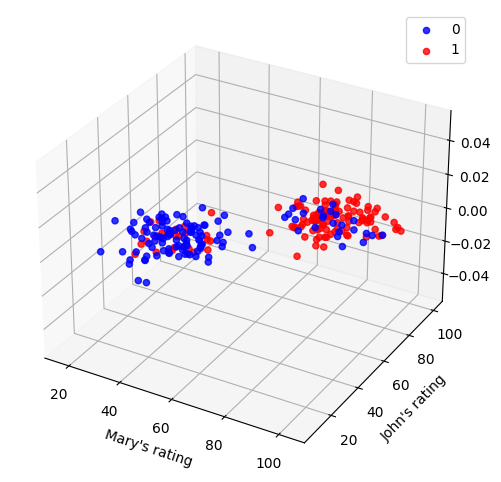

In [ ]:
import matplotlib.pyplot as plt

# Generate some sample data
#np.random.seed(42)
#num_samples = 100
#X = np.random.randn(num_samples, 3)
#y = np.random.choice([0, 1], size=num_samples)
y = y_true_test

# Create a figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Set colors for each class
colors = ['b', 'r']

# Plot data points for each class
for i in range(len(colors)):
    #ax.scatter(X_test[y==i, 0], X_test[y==i, 1], X_test[y==i, 2], c=colors[i], label=i, alpha=0.8)

    ax.scatter(X_test[y==i, 0], X_test[y==i, 1],c=colors[i], label=i, alpha=0.8)

    #ax.scatter(X_test[y==i, 0], X_test[y==i, 1], zs=0, zdir='y', c=colors[i], label=i, alpha=0.8)


#c_list = []
#for c in colors:
    #c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
#ax.scatter(X_test, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Set axis labels and legend
ax.set_xlabel("Mary's rating")
ax.set_ylabel("John's rating")
ax.set_zlabel('')
ax.legend()
#ax.set_zlim(0, 1)

# Show the plot
plt.show()
